# <center><ins>Stroke Patient Healthcare Using Deep Learning</ins></center>


**<ins>Introduction:</ins>**

In healthcare, accurately predicting and managing stroke risk is vital. This project aims to harness deep learning techniques to analyze patient data and forecast the likelihood of stroke occurrence. By leveraging a comprehensive dataset, we seek to identify key risk factors associated with stroke, thereby aiding healthcare professionals in making informed decisions regarding patient care.

The dataset is specifically curated for a project centered on Stroke Patient Healthcare through deep learning methods. It includes a range of health and demographic attributes that are essential for evaluating stroke risk and outcomes.

**<ins>Dataset:</ins>**   
* **ID:** A unique identifier for each individual.
* **Gender:** The gender of the individual (e.g., male or female).
* **Age:** The age of the individual.
* **Hypertension:** A binary indicator of whether the individual has hypertension (high blood pressure).
* **Heart Disease:** A binary indicator of whether the individual has heart disease.
* **Ever Married:** A binary indicator of marital status (whether the individual has ever been married).
* **Work Type:** The type of work the individual engages in (e.g., private, government, self-employed).
* **Residence Type:** The type of area where the individual resides (urban or rural).
* **Average Glucose Level:** The average blood glucose level of the individual, an important marker for diabetes and overall health.
* **BMI:** The Body Mass Index, a measure of body fat based on height and weight.
* **Smoking Status:** The smoking behavior of the individual (e.g., never smoked, formerly smoked, currently smoking).
* **Stroke:** A binary indicator of whether the individual has experienced a stroke.

**<ins>Dataset Link:</ins>**  

https://www.kaggle.com/datasets/fedesoriano/healthcare-dataset-stroke-data

## **(1). Defining Problem Statement and Analyzing Basic Metrics**
***

The primary objective of this project is to build a linear regression model that classifies patient data to predict the likelihood of stroke occurrence. By analyzing various health and demographic attributes, we aim to identify the significant predictors of stroke, enabling healthcare professionals to make informed decisions for early intervention and preventive care.

## **(2). Import libraries and Load the dataset**
***

In [86]:
'''
Building a Linear Regression Model to Classifr Patient's data to predict possibility of Stroke
'''

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# To ignore the warnings & make the code more presentable
import warnings
warnings.filterwarnings("ignore")  # This will suppress warnings in the output


In [87]:
# Load healthcare-dataset-stroke-data.csv dataset into a pandas dataFrame
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [88]:
# shows the top 5 records of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [89]:
# NOTE: If the original dataset did not have any headers/column-name, then we can update the respective column-name for the dataset as below:

# df.columns = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
# df.columns

## **(3) Data Exploration and Pre-processing**
***

### **Check basic metrics and data types**

Understanding the structure of the dataset, including the number of rows and columns, and the data types of each attribute. It is a crucial step in **data exploration.**

In [90]:
# Checking the number of rows and columns in our Dataset
df.shape

(5110, 12)

#### **Observations:**

- **Row**: We have **5110 Rows**.
- **Columns**: We have **12 columns**.

In [91]:
# Getting a summary of the DataFrame's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### **Observations:**

- **Entries**: The DataFrame contains **5110 entries**.
- **Columns**: There are **12 columns**, representing various patient attributes.

Data Types

- **Integer (`int64`)**: 4 columns (e.g., `hypertension`, `stroke`).
- **Float (`float64`)**: 3 columns (e.g., `age`, `avg_glucose_level`).
- **Object**: 5 columns (e.g., `gender`, `work_type`).

Memory Usage

- The DataFrame uses approximately **479.2 KB** of memory.


In [92]:
# Describing the statistical summary of numerical type data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### **Observations:**

- **Count**: Most features have **5110 entries**, except `bmi`, which has **4909** due to missing values.
  
- **Age**:
  - **Mean**: Approximately **43.2 years**.
  - **Range**: From **25 to 82 years**.

- **Hypertension**:
  - **Mean**: About **9.7%** of patients have hypertension.
  - **Maximum**: Up to **1** (indicating presence of hypertension).

- **Heart Disease**:
  - **Mean**: Roughly **5.4%** of patients have heart disease.

- **Average Glucose Level**:
  - **Mean**: Approximately **106.1 mg/dL**.
  - **Range**: From **55.1 to 271.7 mg/dL**.

- **BMI**:
  - **Mean**: Around **28.9**.
  - **Range**: From **10.3 to 97.6**.

- **Stroke**:
  - **Mean**: About **4.9%** of patients have experienced a stroke.
  - **Maximum**: Up to **1** (indicating stroke occurrence).

**Insights**
- The relatively low percentage of stroke occurrences (4.9%) suggests that while risk factors are present, many patients do not experience strokes. This highlights the potential for preventive interventions targeting identified risk factors.


### **Statistical Summary of categorical type data**

In [93]:
# Statistical summary of categorical type data
df.describe(include = object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### **Observations**

- **Count**: All categorical features have **5110 entries**, indicating a complete dataset for these columns.

- **Unique Values**:
  - **Gender**: 3 unique values (e.g., Male, Female, Other).
  - **Ever Married**: 2 unique values (Yes, No).
  - **Work Type**: 5 unique values (e.g., Private, Government, Self-employed, etc.).
  - **Residence Type**: 2 unique values (Urban, Rural).
  - **Smoking Status**: 4 unique values (e.g., Never smoked, Formerly smoked, Currently smoking).

- **Most Frequent Values**:
  - **Gender**: The most common category is **Female** with **2994** occurrences.
  - **Ever Married**: **Yes** is the most frequent response, with **3353** occurrences.
  - **Work Type**: The **Private** sector is the most common, appearing **2925** times.
  - **Residence Type**: **Urban** areas are more common, with **2596** occurrences.
  - **Smoking Status**: The most common status is **never smoked**, with **1892** occurrences.
  
**Insights**
- The predominance of females and married individuals suggests a potential demographic focus for healthcare interventions. Additionally, the high frequency of private work and urban residence may reflect socioeconomic factors influencing health outcomes.



### **Check for missing values**

This is both a **data cleaning** and **data preprocessing** step. Identifying and handling missing values is considered **data cleaning** since it involves addressing the issue of incomplete data. Depending on the extent of missing data, you may need to decide how to handle it, either by imputing values or removing the affected rows/columns. Additionally, it is also a **data preprocessing** step since having missing values can impact the effectiveness of subsequent analyses, and addressing them helps ensure the data is in a suitable form for analysis.

In [94]:
# Display the count of missing values for each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [95]:
# Calculate the missing values percentage for each column and round to two decimal places
missing_values_percentage = (df.isnull().mean() * 100).round(2)

# Display the missing values percentage for each column
print("Missing Values Percentage:\n")
print(missing_values_percentage)

Missing Values Percentage:

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64


### **Observations**

- **Missing Values Percentage**:
  - All columns, except for **`bmi`**, have a missing values percentage of **0.00%**.
  - The **`bmi`** column has a missing values percentage of **3.93%**, indicating that **201 out of 5110 entries** are missing.

**Insights**
- The **3.93%** missing data in the **`bmi`** column is relatively low but still significant enough to warrant consideration. Handling these missing values through methods such as imputation is essential to ensure the integrity of analyses and predictive modeling.

### **Handling null values**

In [96]:
# Impute missing values in 'bmi' with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

### Rationale for Using Median Imputation for `bmi`

In this project, we are imputing the missing values in the `bmi` column with the **median** for several key reasons:

1. **Robustness to Outliers**:
   - The median is less sensitive to extreme values than the mean. In health-related datasets, outliers can significantly skew the mean. Using the median provides a more accurate representation of the central tendency of `bmi`, which is crucial for stroke risk assessment.

2. **Skewed Distribution**:
   - If the distribution of `bmi` is not symmetrical and is instead skewed, the median will offer a better estimate of a typical value. This is important for ensuring that the imputed values are representative of the population.

3. **Data Integrity**:
   - Imputing missing values with the median allows us to retain all entries in the dataset, minimizing data loss. This ensures that our model has sufficient data for training, which is vital for generating reliable predictions.

4. **Simplicity and Efficiency**:
   - Median imputation is straightforward to implement and computationally efficient, making it an effective choice for handling missing data in this context.

By using median imputation for `bmi`, we enhance the robustness of our analysis and ensure that the model is built on a solid foundation, leading to more reliable stroke risk predictions.


## **(4) Data Analysis**

Data analysis focuses on identifying key factors that contribute to stroke occurrences in patients by examining a comprehensive dataset. Variables such as age, gender, body mass index (BMI), smoking status, and medical history will be analyzed to uncover patterns and correlations.

Utilizing data visualization techniques, this study aims to communicate findings effectively, informing healthcare providers about stroke risk factors

### **A. Distribution of Stroke Occurrences**

Let's Start by visualizing the target variable to understand the balance of stroke occurrences.

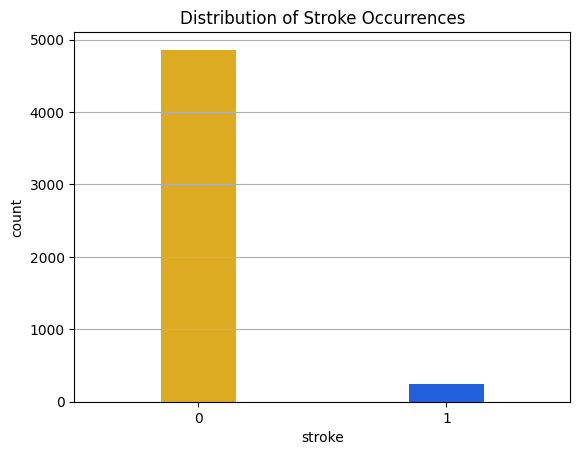

In [97]:
# Plotting countplot to understand the balance of stroke occurrences.
sns.countplot(data=df, x='stroke', width=0.3, palette=['#fcba03', '#0356fc'])
plt.title('Distribution of Stroke Occurrences')
plt.grid(axis='y')
plt.show()


### **Observation**

The data shows an imbalance, with around 80% of cases being non-stroke and only 20% being stroke cases. This imbalance means that stroke cases are less common in the dataset, which is important to keep in mind as we analyze and interpret the data

### **B. Age Distribution**

Since age is a continuous variable, let’s explore its distribution, especially comparing those with and without a stroke

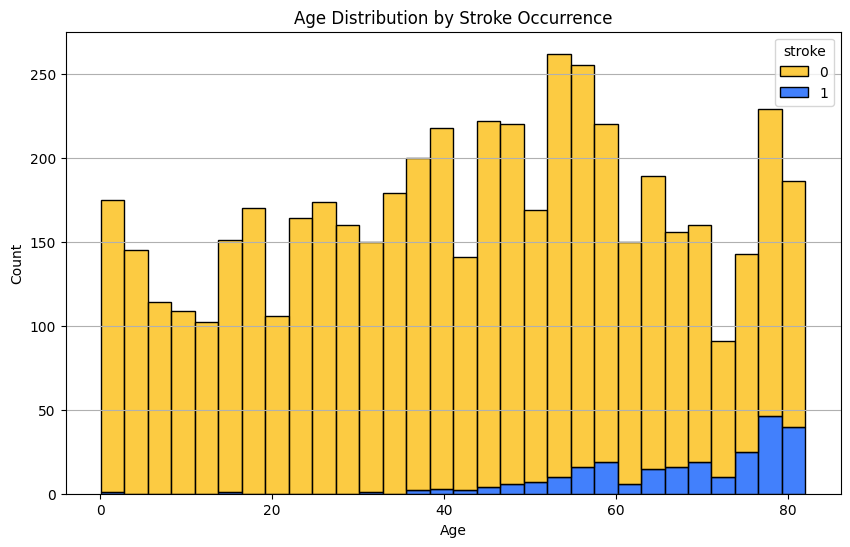

In [98]:
# Plotting histplot to understand Age Distribution by Stroke Occurrence
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', bins=30, palette=['#fcba03', '#0356fc'])
plt.title('Age Distribution by Stroke Occurrence')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


### **Observation**

- The data indicates that stroke cases are most prevalent in older age groups, peaking at around age 70 with approximately 50 cases, and again at age 80 with around 40 cases.
- Younger age groups show very few stroke cases.
- There is a slight decrease in stroke counts around age 60 before numbers rise again in the subsequent older age brackets.


### **C. Average Glucose Level and Stroke**

A box plot can help illustrate the distribution of avg glucose level for patients with and without strokes.

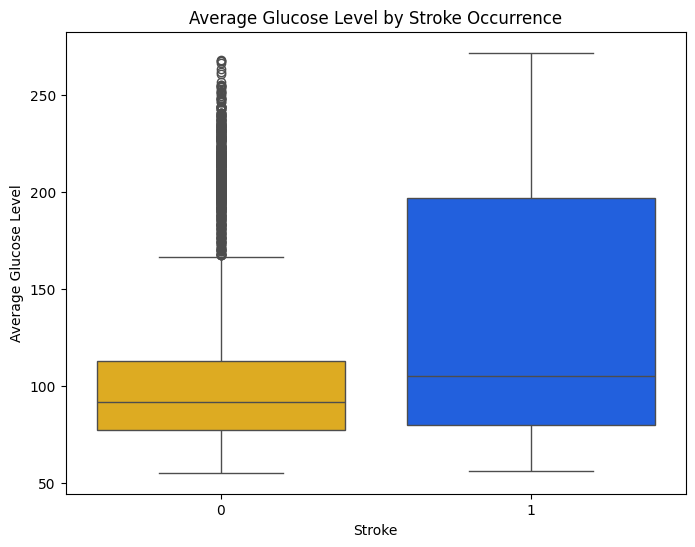

In [99]:
# Plotting distribution of avg glucose level for patients with and without strokes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette=['#fcba03', '#0356fc'])
plt.title('Average Glucose Level by Stroke Occurrence')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()


### **Observation**

**Non-Stroke Cases (stroke = 0)**

- Minimum glucose level: 55
- Q1: Approximately 30, indicating that 25% of non-stroke patients have glucose levels below this value.
- Median: Around 90, suggesting that the central tendency of glucose levels for non-stroke patients is relatively low.
- Q3: Around 130, with a maximum of approximately 160, indicating that 75% of non-stroke patients have glucose levels below 130.
- Numerous outliers are present beyond 160, suggesting that some patients have significantly elevated glucose levels.

**Stroke Cases (stroke = 1)**

- Minimum glucose level: 60
- Q1: Similar to the non-stroke group, starting at approximately 35.
- Median: Around 105, which is higher than that of non-stroke patients, suggesting that stroke patients tend to have higher average glucose levels.
- Q3: Reaches around 200, indicating that 75% of stroke patients have glucose levels below this value, with a maximum level also at approximately 200.
- No outliers are present in this group, indicating a more concentrated distribution of glucose levels among stroke patients.

**Summary**

These boxplots indicate that stroke patients have higher average glucose levels than non-stroke patients. The presence of outliers in non-stroke cases and their absence in stroke cases suggest differing health profiles and glucose regulation issues between the two groups. This may imply that elevated glucose levels are linked to an increased risk of stroke, highlighting the importance of glucose management in stroke prevention.


### **D. BMI Distribution by Stroke Occurrence**

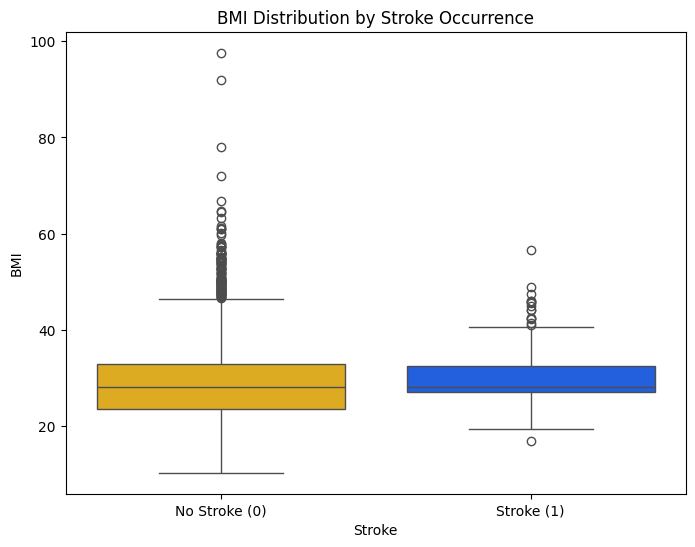

In [100]:
# Plotting BMI distribution by stroke occurrence
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stroke', y='bmi', palette=['#fcba03', '#0356fc'])
plt.title('BMI Distribution by Stroke Occurrence')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Stroke (0)', 'Stroke (1)'])
plt.show()

### **Observation**

**Non-Stroke Cases (stroke = 0)**
- Minimum BMI: 5, an extremely low value warranting further investigation.
- Q1: Approximately 25, indicating that 25% have a BMI below this level.
- Median: Moderate, around the midpoint of the IQR.
- Q3: Ranges from 35 to 45, with 75% below this range.
- Numerous outliers: Dark points from 45 to around 60, additional outliers between 60 and 80, and two near 100.

**Stroke Cases (stroke = 1)**
- Minimum BMI: 20, setting a lower bound for this group.
- Q1: Around 30, with 25% having a BMI below this value.
- Median: 32, higher than that of non-stroke patients.
- Q3: Ranges from 35 to 40, with 75% below this range.
- Some outliers near 50, one close to 60, and one below the minimum.

**Summary**

The analysis indicates that stroke patients have a lower median BMI than non-stroke patients, with fewer extreme values. Outliers in both groups reflect variability in BMI, suggesting different health profiles.


## **E. Categorical Variables vs. Stroke Occurrence**

Analyzing how each categorical variable correlates with the stroke variable.

### A. Gender and Stroke

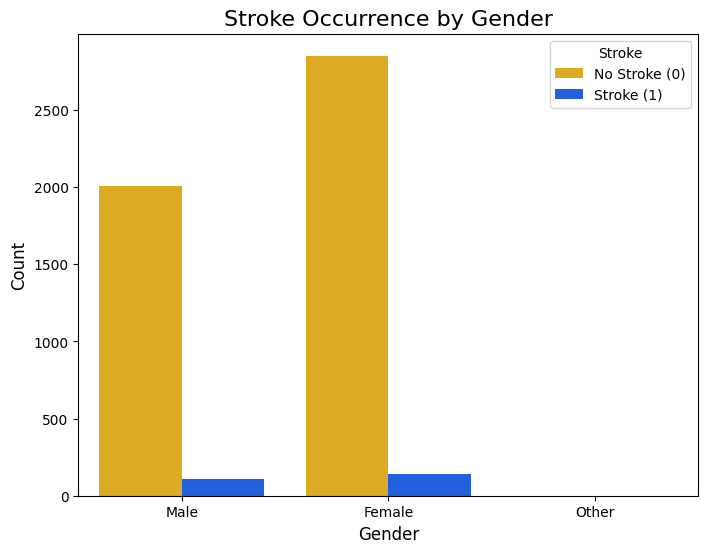

In [101]:
# Gender and Stroke
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='stroke', palette=['#fcba03', '#0356fc'])

plt.title('Stroke Occurrence by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Stroke', loc='upper right', labels=['No Stroke (0)', 'Stroke (1)'])

plt.show()

### **Observation**

**Stroke Occurrence by Gender**
- Females have a higher incidence of strokes, with approximately 100 cases compared to males, indicating a potential gender disparity in stroke risk.

**Non-Stroke Counts**
- Non-stroke cases are significantly higher for both genders:
  - About 2000 males are non-stroke patients.
  - About 3000 females are non-stroke patients.
- This suggests a larger proportion of non-stroke patients overall, with females showing a slightly higher count.

**Overall Gender Distribution**
- While females have a higher stroke incidence, there are still substantially more non-stroke patients in both genders.
- The contrast in stroke occurrence may warrant further exploration of the underlying factors influencing stroke risk among females compared to males.

**Summary**

These observations highlight the need for further investigation into gender-specific stroke risk factors, as the higher incidence in females contrasts with the overall higher counts of non-stroke patients. This could inform targeted health interventions and awareness programs focused on stroke prevention, particularly for females.


### B. Smoking Status and Stroke

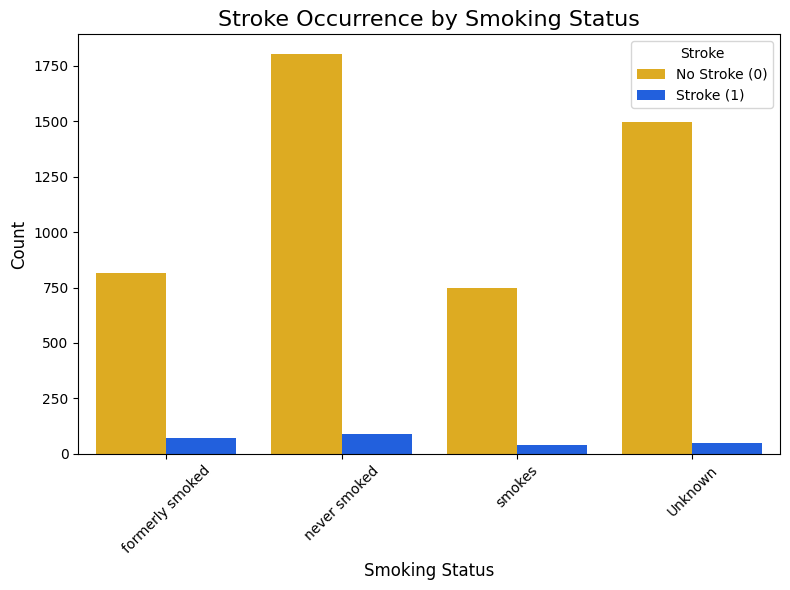

In [ ]:
# Smoking Status and Stroke
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke', palette=['#fcba03', '#0356fc'])  

plt.title('Stroke Occurrence by Smoking Status', fontsize=16)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)

plt.legend(title='Stroke', loc='upper right', labels=['No Stroke (0)', 'Stroke (1)'])

plt.tight_layout()
plt.show()


### **Observation**

**Formerly Smoked**
- Approximately 800 non-stroke cases and around 50 stroke cases are reported, indicating a relatively lower stroke risk compared to never smokers.

**Never Smoked**
- This group has the highest count of non-stroke cases (about 1800) and around 100 stroke cases, suggesting a protective effect against stroke.

**Currently Smoking**
- Non-stroke cases among current smokers are slightly lower than those who formerly smoked, with stroke counts also lower than both formerly smoked and never smoked categories. This implies that smoking may not strongly correlate with stroke incidence.

**Unknown Smoking Status**
- About 1500 individuals are classified as unknown smoking status, with a higher incidence of stroke compared to non-smokers, suggesting significant risk factors may be associated with this category.

**Summary**

Overall, the data shows that individuals who never smoked have the lowest stroke rates, while both formerly and currently smoked individuals experience lower incidences compared to those with unknown smoking status. This indicates that smoking status may influence stroke risk, but further analysis is necessary to understand the factors in the unknown category and the overall impact of smoking on stroke incidence.


### C. Work Type and Stroke

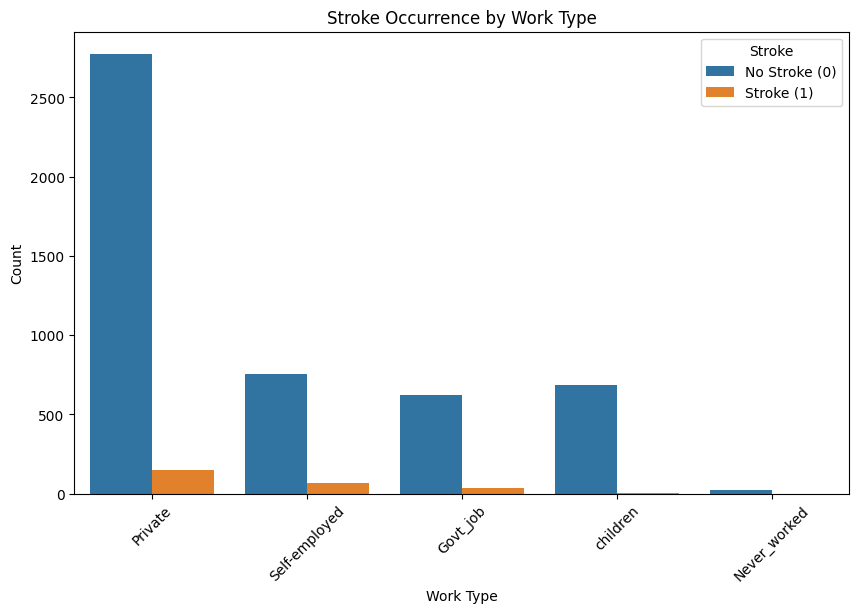

In [103]:
# Work Type and Stroke
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title('Stroke Occurrence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke (0)', 'Stroke (1)'])
plt.show()

### **Observation**

**Never Worked**
- No stroke cases are reported, indicating this group is not at risk for stroke in the dataset.

**Children**
- Stroke cases among children are low, suggesting that strokes are rare in this age group.

**Government Jobs**
- Stroke cases are present but low; the non-stroke count is slightly higher, indicating more government employees do not experience strokes.

**Self-Employed**
- This category shows a slightly higher incidence of strokes compared to government jobs, but the non-stroke count remains significantly higher, indicating some risk but not extensive.

**Private Sector**
- The private sector has the highest stroke count at approximately 150, with non-stroke cases exceeding 2500, suggesting higher risks for stroke compared to other work types.

**Summary**

The analysis shows that while strokes occur across different work types, the private sector has the highest incidence. In contrast, government jobs and individuals who never worked exhibit lower stroke counts. The absence of stroke cases in the "never worked" category suggests that employment type may influence stroke risk, warranting further investigation into factors contributing to higher stroke rates in the private sector.


### **F. Correlation Heatmap (Numeric Variables)**

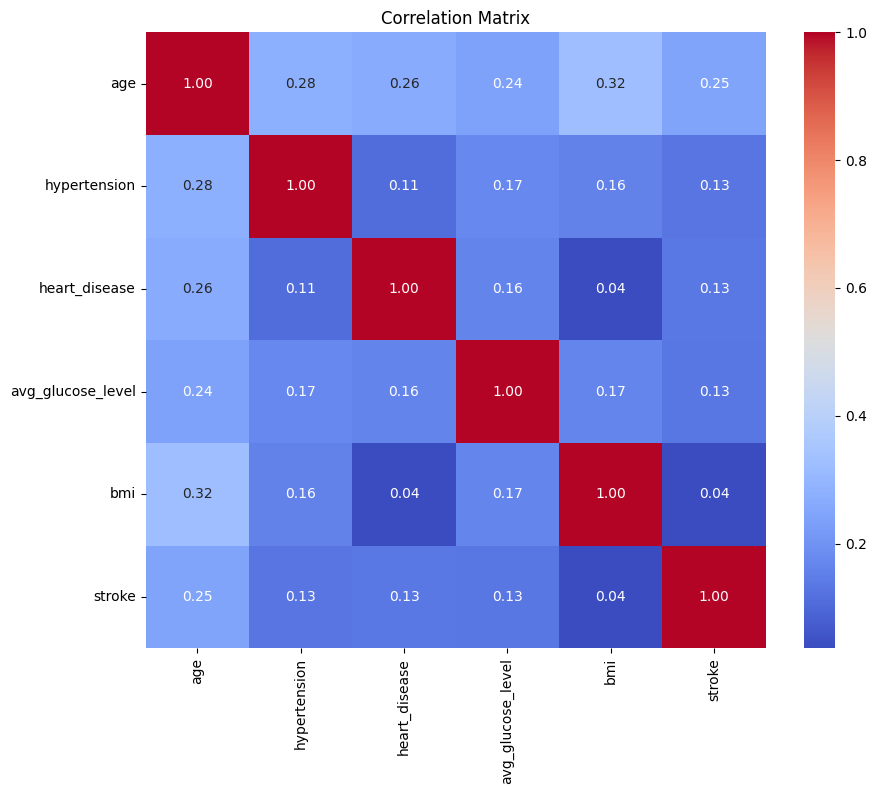

In [104]:
# Correlation Heatmap for Numeric Variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### **Observation from Correlation Heatmap** 


- BMI and Age have the highest correlation among the variables, with a moderate positive relationship of 0.32.
- Hypertension and Age also show a positive correlation of 0.28, indicating a trend where older age is somewhat associated with higher rates of hypertension.
- Age and Stroke have a correlation of 0.25, suggesting that stroke occurrence slightly increases with age.


**Summary**

Overall, the correlations are relatively weak, indicating that no single factor has a strong linear relationship with stroke.


### **Summary of Data Analysis**

This analysis indicates that while factors like age, BMI, and glucose levels may be associated with stroke risk, the correlations are not strong. This suggests that stroke risk is likely influenced by a combination of factors rather than any single variable, warranting further investigation through predictive modeling.


### **5. Data Encoding**

Categorical Encoding:

Convert categorical variables (e.g., gender, ever_married, work_type, Residence_type, smoking_status) into numerical formats. we can use techniques such as:

    One-Hot Encoding: For nominal variables (e.g., gender, work_type).
    
    Label Encoding: For ordinal variables (if any, though none are specified here)

In [105]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,False,False,True,False,True,False,False,True,False,True,False
5106,44873,81.0,0,0,125.20,40.0,0,False,False,True,False,False,True,False,True,False,True,False
5107,19723,35.0,0,0,82.99,30.6,0,False,False,True,False,False,True,False,False,False,True,False
5108,37544,51.0,0,0,166.29,25.6,0,True,False,True,False,True,False,False,False,True,False,False


### **Observations**

- **Feature Expansion**: The original dataset of 12 columns has been expanded to **18 columns** after encoding categorical variables. This increase allows the model to better capture relationships between categorical features and stroke risk.

- **Binary Encoding**:
  - **Gender**: Two new binary columns were created for `gender` (`gender_Male`, `gender_Other`), indicating the gender of the patient.
  - **Ever Married**: The column `ever_married_Yes` indicates whether a patient has ever been married, converting this binary categorical variable into a numerical format.
  - **Work Type**: The `work_type` variable has been encoded into multiple columns, representing different work statuses (e.g., `work_type_Never_worked`, `work_type_Private`, etc.).
  - **Residence Type**: The `Residence_type` column has been transformed into a binary variable (`Residence_type_Urban`), indicating whether the patient lives in an urban area.
  - **Smoking Status**: Four new columns represent different smoking statuses (`smoking_status_formerly smoked`, `smoking_status_never smoked`, `smoking_status_smokes`), allowing the model to evaluate the impact of smoking on stroke risk.

- **Boolean Columns**: The encoded columns are in a binary format (True/False), which is suitable for machine learning algorithms, as they interpret these values easily.

**Insights**
- The encoding process facilitates better model performance by allowing algorithms to understand categorical data in a numerical format. This transformation is essential for effective analysis and prediction in the stroke risk assessment model.